In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Подключаем либы и проведем базовый анализ данных, что получилось подтянуть с WB.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/classification_of_reviews/wb_reviews.csv"

df = pd.read_csv(file_path)

df.head()

,Good's name,Description,Review,Rating
0,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,Хорошо моет,5
1,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,"При первом использовании заметил ,что мочалка ...",1
2,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,Супер всё!,5
3,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,"Пошита, на первый взгляд, не плохо. Мылится не...",5
4,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,Слишком мягкая,1


In [ ]:
print(df.info())
print(df.isna().sum())
missing_counts = df.groupby("Good's name")["Description"].apply(lambda x: x.isna().any()).sum()
print(f"We have {missing_counts} goods without description")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196945 entries, 0 to 196944
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Good's name  196945 non-null  object
 1   Description  191694 non-null  object
 2   Review       196943 non-null  object
 3   Rating       196945 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.0+ MB
None
Good's name       0
Description    5251
Review            2
Rating            0
dtype: int64
We have 7 goods without description


Все мы понимаем, что люди довольно склонны писать положительные отзывы. Особенно хорошо это заметно на WB, где абсолютное большинство товаров имеют рейтинг выше 4.5. Поэтому давайте в первую очередь проанализируем соотношение количества отзывов в зависимости от оценки.

<Axes: ylabel='count'>

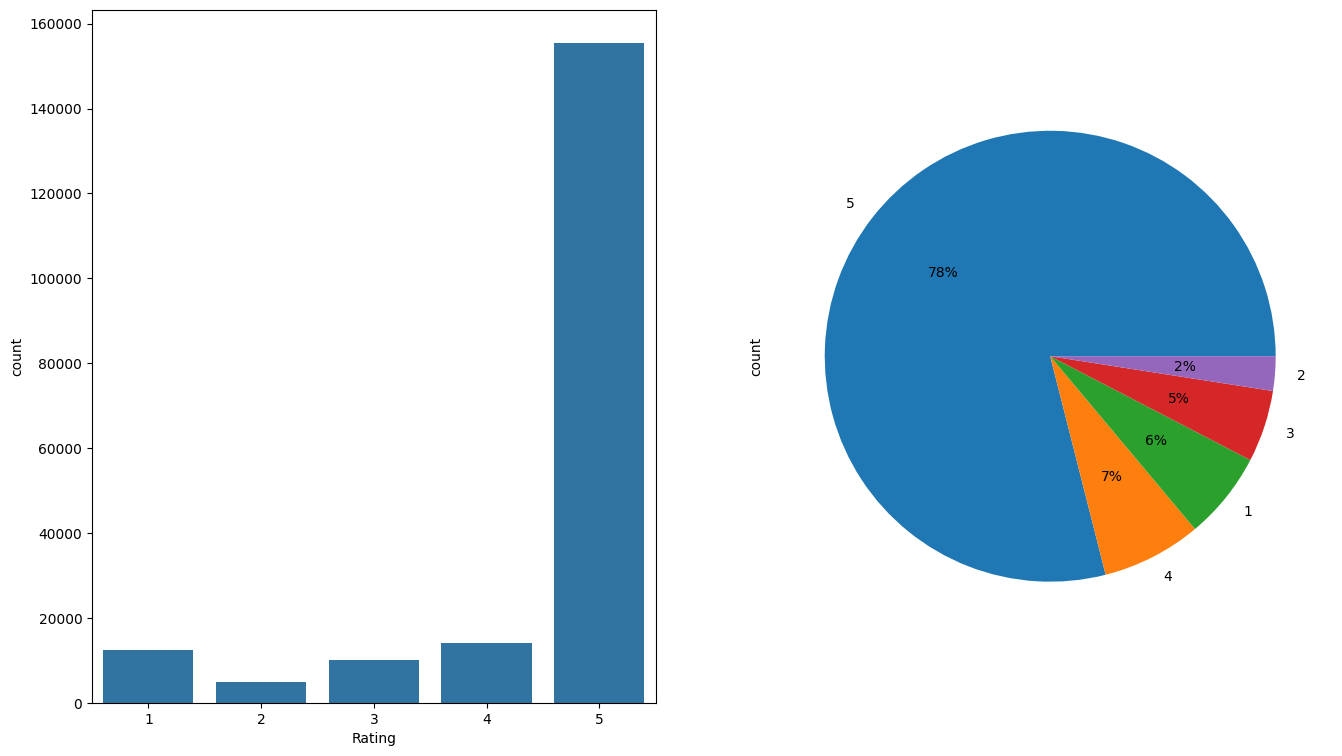

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x="Rating", data=df, ax=axes[0])
df["Rating"].value_counts().plot(kind = "pie", autopct = "%.d%%", ax=axes[1])

Видим, что оценок "5" и правда неадекватно много в наших данных, однако мы можем добиться примерно равномерного распределения, если оставим около 20-30 тысяч 5-бальных отзывов.

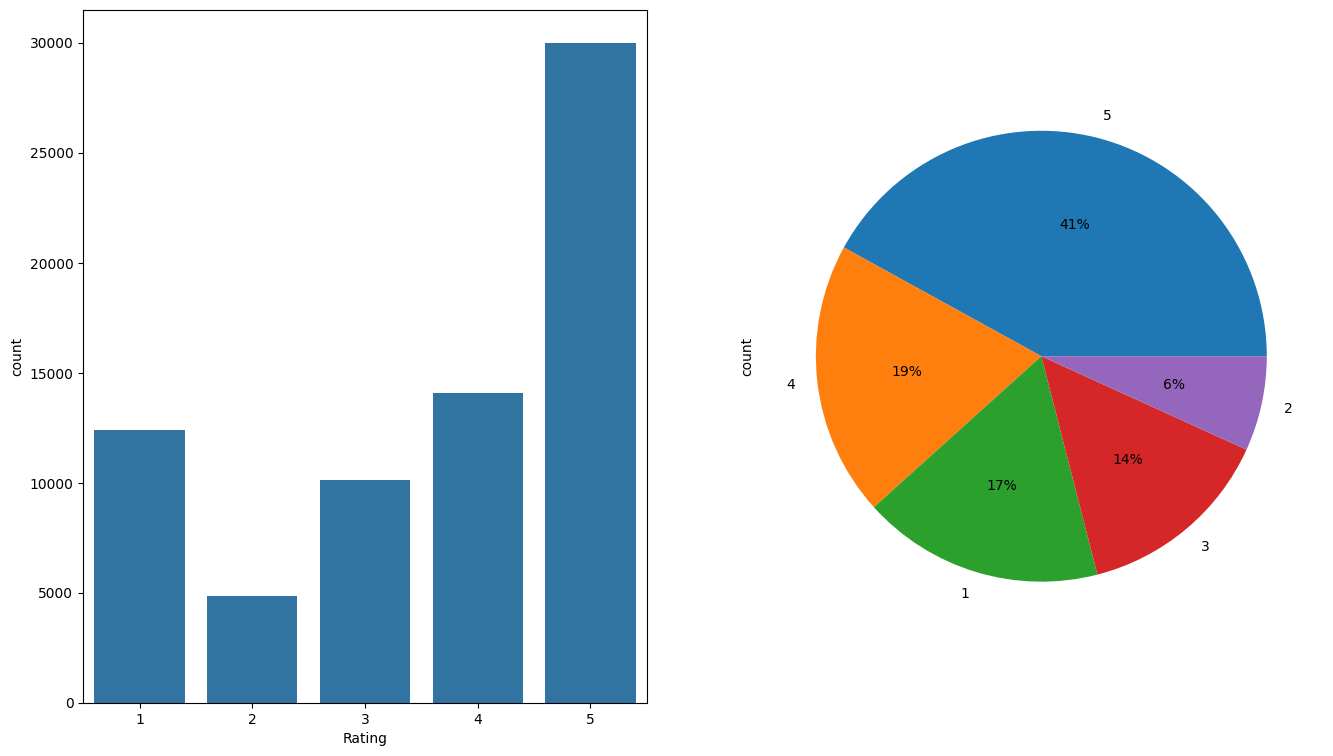

We will have 71446 reviews after they will be balanced!


In [ ]:
df_reviews_5 = df[df["Rating"] == 5].sample(n=30000, random_state=42)
df_reviews_other = df[df["Rating"] != 5]
balanced_df = pd.concat([df_reviews_5, df_reviews_other])

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x="Rating", data=balanced_df, ax=axes[0])
balanced_df["Rating"].value_counts().plot(kind = "pie", autopct = "%.d%%", ax=axes[1])
plt.show()
print(f"""We will have {balanced_df.shape[0]} reviews after they will be balanced!""")

Окей, мы разобрались с соотношением отзывов. Теперь немного посмотрим на распределение отзывов в зависимости от их размера. Мы хотим это учесть, тк, возможно, мы будем считать отзывы из малого количества слов/символов несодержательными.

(0.0, 20.0)

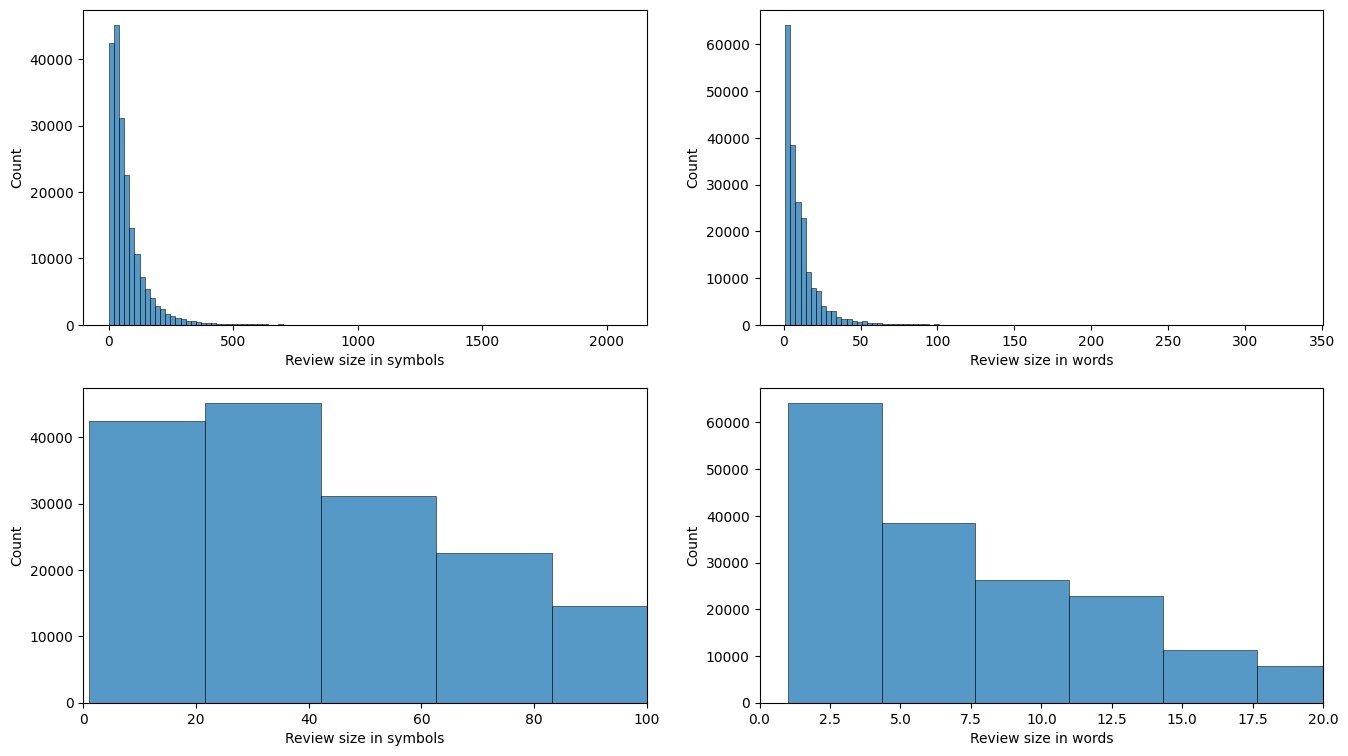

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#Считаем относительно символов
df["Review size in symbols"] = df["Review"].apply(lambda x: len(str(x)))
sns.histplot(data=df["Review size in symbols"], ax=axes[0, 0], bins=100)

#Считаем относительно количества слов
df["Review size in words"] = df["Review"].apply(lambda x: len(str(x).split(' ')))
sns.histplot(data=df["Review size in words"], ax=axes[0, 1], bins=100)

#Теперь посмотрим на аналогичное, но приблизим на начало

#Считаем относительно символов
sns.histplot(data=df["Review size in symbols"], ax=axes[1, 0], bins=100)
axes[1, 0].set_xlim(0, 100)

#Считаем относительно количества слов
sns.histplot(data=df["Review size in words"], ax=axes[1, 1], bins=100)
axes[1, 1].set_xlim(0, 20)

plt.show()

Теперь посмотрим на это чудо в виде ящика с усами.

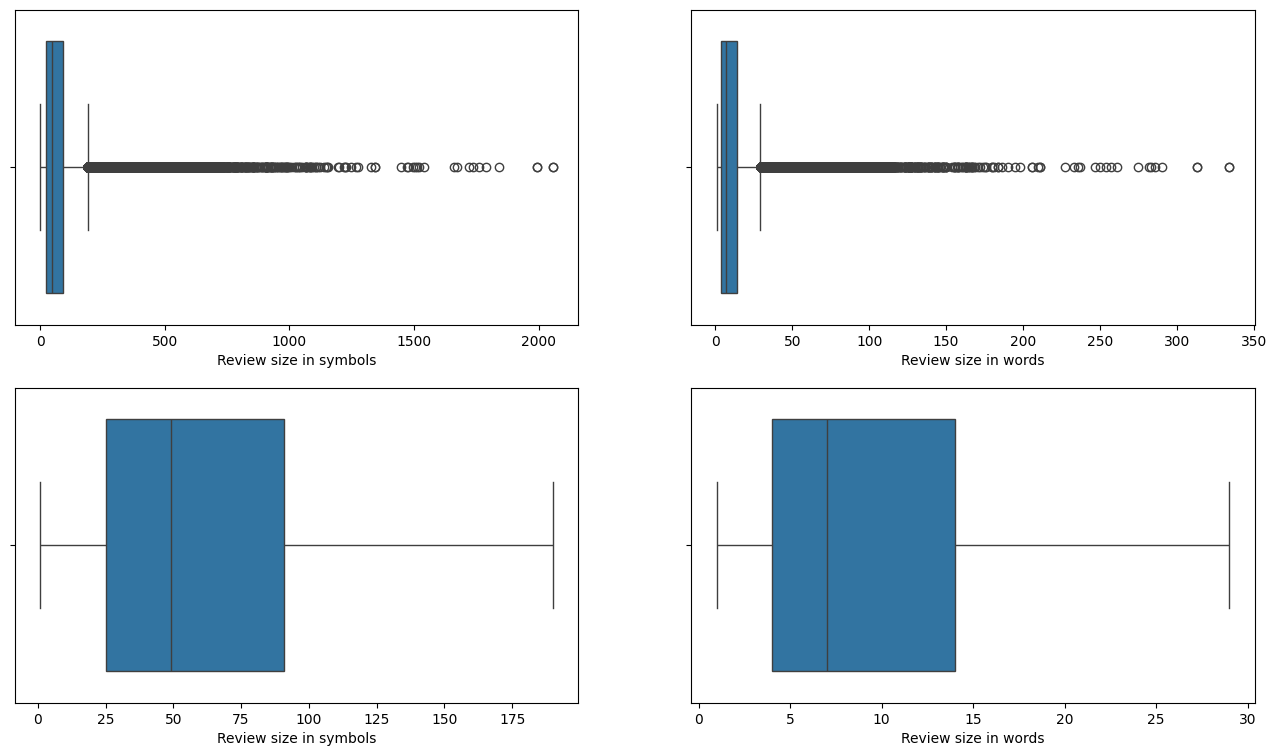

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#Size in symbols
sns.boxplot(x="Review size in symbols", data=df, ax=axes[0, 0])

#Size in words
sns.boxplot(x="Review size in words", data=df, ax=axes[0, 1])

#Size in symbols without fliers
sns.boxplot(x="Review size in symbols", data=df, ax=axes[1, 0], showfliers=False)

#Size in words without fliers
sns.boxplot(x="Review size in words", data=df, ax=axes[1, 1], showfliers=False)

plt.show()

Интересно сравнить с картиной для урезанного варианта датафрейма(где мы выкинули часть высоких оценок для баланса во вселенной).

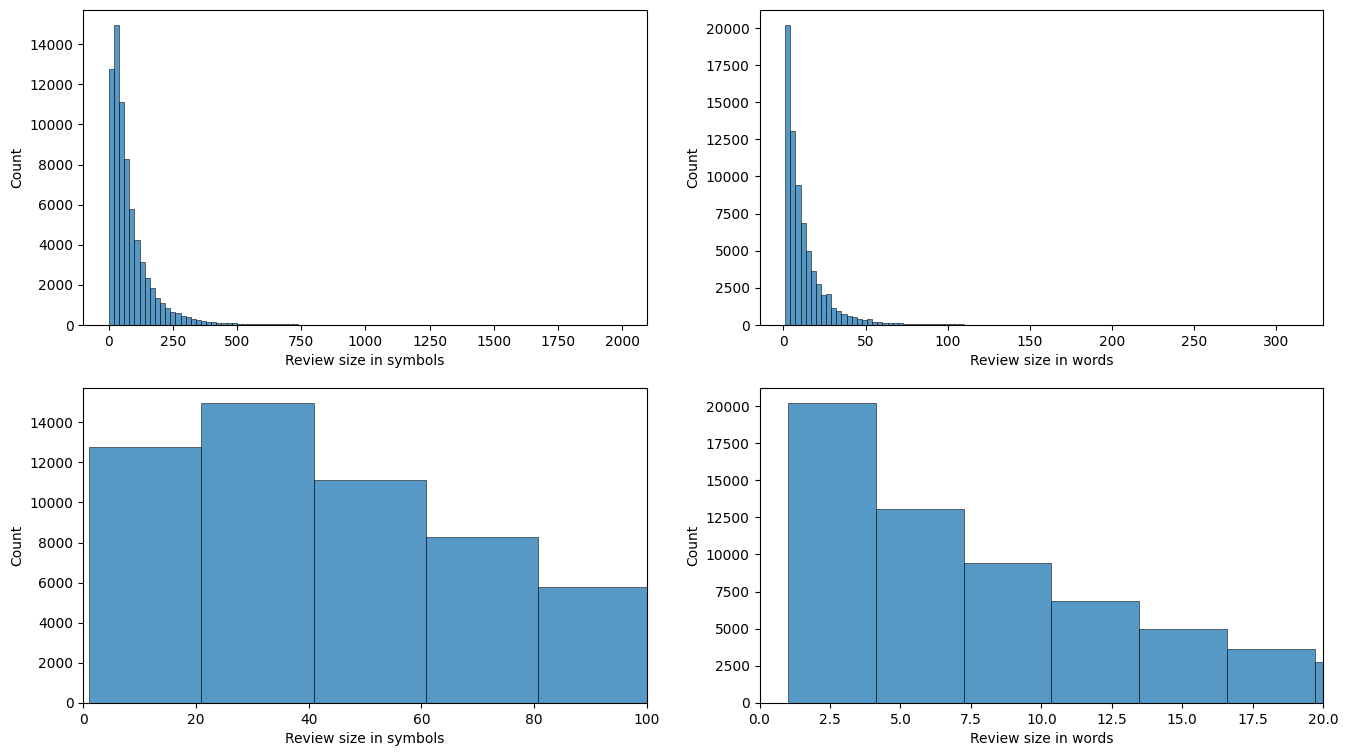

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#Считаем относительно символов
balanced_df["Review size in symbols"] = balanced_df["Review"].apply(lambda x: len(str(x)))
sns.histplot(data=balanced_df["Review size in symbols"], ax=axes[0, 0], bins=100)

#Считаем относительно количества слов
balanced_df["Review size in words"] = balanced_df["Review"].apply(lambda x: len(str(x).split(' ')))
sns.histplot(data=balanced_df["Review size in words"], ax=axes[0, 1], bins=100)

#Теперь посмотрим на аналогичное, но приблизим на начало

#Считаем относительно символов
sns.histplot(data=balanced_df["Review size in symbols"], ax=axes[1, 0], bins=100)
axes[1, 0].set_xlim(0, 100)

#Считаем относительно количества слов
sns.histplot(data=balanced_df["Review size in words"], ax=axes[1, 1], bins=100)
axes[1, 1].set_xlim(0, 20)

plt.show()

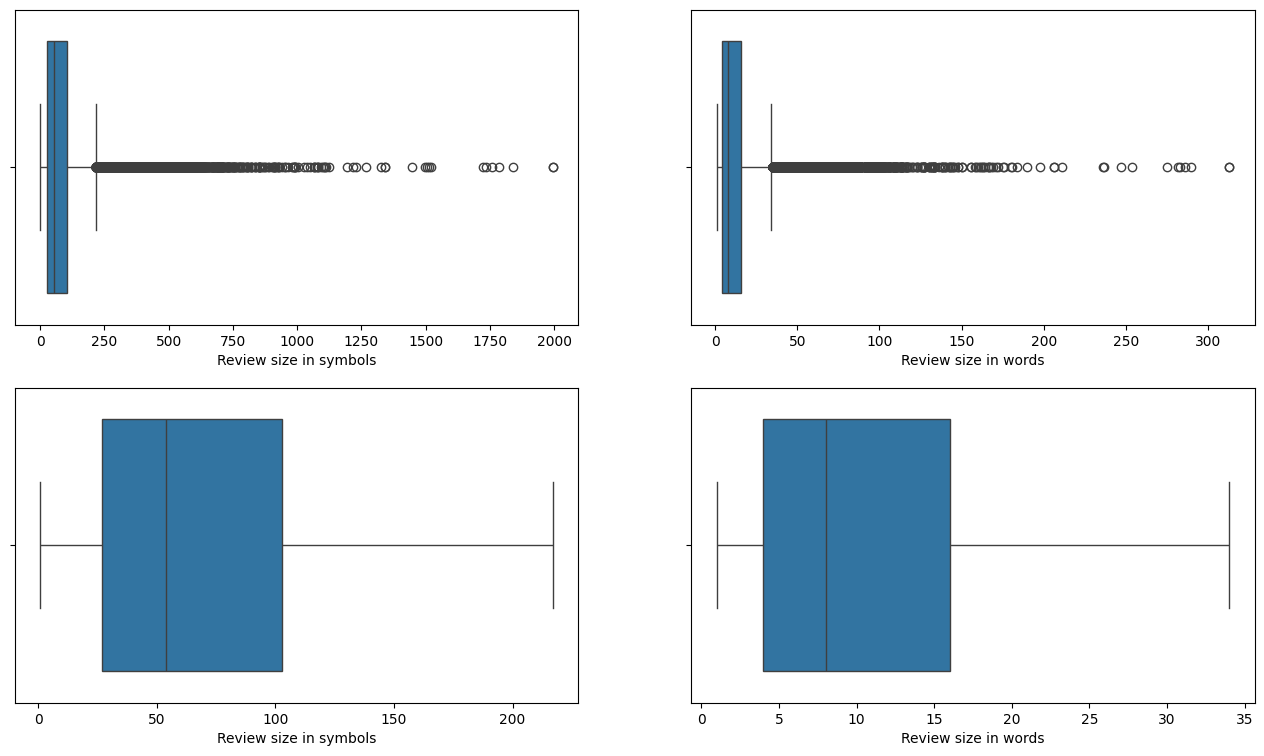

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#Size in symbols
sns.boxplot(x="Review size in symbols", data=balanced_df, ax=axes[0, 0])

#Size in words
sns.boxplot(x="Review size in words", data=balanced_df, ax=axes[0, 1])

#Size in symbols without fliers
sns.boxplot(x="Review size in symbols", data=balanced_df, ax=axes[1, 0], showfliers=False)

#Size in words without fliers
sns.boxplot(x="Review size in words", data=balanced_df, ax=axes[1, 1], showfliers=False)

plt.show()